# Coursera ML Exercise 2

In [28]:
%matplotlib notebook
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas
import os

100

## 1 Logistic Regression

### 1.1 Visualizing the data

<IPython.core.display.Javascript object>


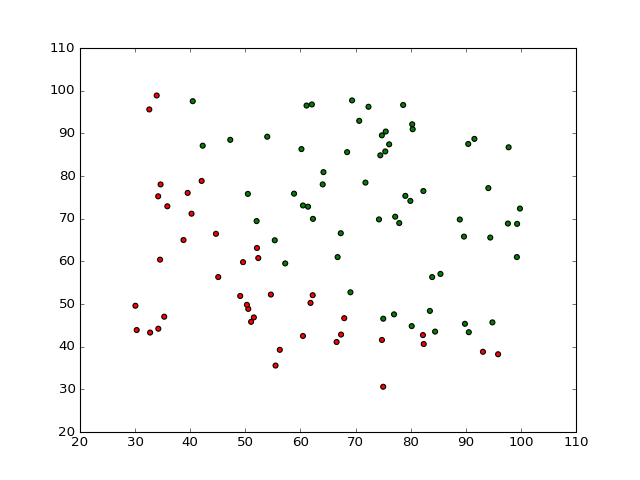

In [30]:
data_admits = pandas.read_table("ex2data1.txt", 
                                sep=',', header=None, 
                                names=['exam1','exam2', 'admit'])

admits_features = np.vstack([np.ones(len(data_admits)), 
                            np.array(data_admits.exam1), 
                            np.array(data_admits.exam2)])
admits_labels = np.array(data_admits.admit)

colors = ['red', 'green']

admits_scatter = plt.figure()
admits_scatter_ax = admits_scatter.add_subplot(111)
admits_scatter_ax.scatter(data_admits.exam1, data_admits.exam2,
                          c=data_admits.admit, 
                          cmap=matplotlib.colors.ListedColormap(colors))

## 1.2 Implementation

### 1.2.1 Sigmoid Function

- Remember, logistic regression hypothesis defined as: 
    $$ h_\theta(x) = g(\theta^Tx) $$
- where function $g$ is sigmoid function:
    $$ g(z) = \frac{1}{1 + e^{-z}} $$
- So really hypothesis function is:
    $$ \large g(z) = \frac{1}{1 + e^{\theta^Tx}} $$

In [31]:
def sigmoid(z):
    """Computes sigmoid function for a given input z. Works 
    on scalars or vectors thanks to numpy functions"""
    return 1 / (1 + np.exp(-z))

### 1.2.2 Cost function & gradient

Cost function given as:

$$ \large
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \big[ -y^{(i)}\log(h_\theta(x^{(i)} )) - (1 - y^{(i)})\log(1 - h_\theta(x^{(i)})) \big]
$$

where labels $ y^{(i)} $ are either $ 0 $ or $1$



In [32]:
def computeCost(X, y, theta):
    """Computes logistic regression cost function for given data X 
    and y and parameters theta, with a logistic hypothesis function"""
    m = len(y)
    h_theta = sigmoid(np.dot(theta.T, X))
    
    return (1/m) * np.sum(-y * np.log(h_theta) - (1 - y) * 
                         np.log(1 - h_theta))
    

In [34]:
admits_model = np.zeros(np.shape(admits_features)[0])

computeCost(admits_features, admits_labels, admits_model)

0.69314718055994529